In [11]:
conda install -c conda-forge yfinance

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - yfinance


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbd8a1cb_1         155 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py312h81bd7bf_0         1.1 MB  conda-forge
    html5lib-1.1               |     pyhd8ed1ab_2          93 KB  conda-forge
    libexpat-2.6.2             |       hebf3989_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-forge
    libzlib-1.2.13             |       hfb2fe0b_6          46 KB  conda-forge
    multitasking-0.0.9         |     pyhd8ed1ab_0          12 KB  conda-forge
    openssl-3.5.0              |       h81ee80

In [13]:
# Step 1: Install yfinance if not already installed
# !pip install yfinance

# Step 2: Import yfinance and pandas
import yfinance as yf
import pandas as pd

# Step 3: Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2020-12-31')

# Step 4: Reset the index
tesla_data.reset_index(inplace=True)

# Step 5: Display the first 5 rows
print(tesla_data.head())

# Optional: Save to CSV file
tesla_data.to_csv('tesla_data.csv', index=False)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Fetch the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Look for the table that contains Tesla's quarterly revenue
tables = soup.find_all("table")

tesla_revenue = None

for table in tables:
    try:
        df = pd.read_html(str(table))[0]
        if df.columns[0] == "Tesla Quarterly Revenue":
            tesla_revenue = df
            break
    except:
        continue

# Step 4: Check if table was found
if tesla_revenue is not None:
    # Drop the first row which is a header repeated inside the table
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue.dropna(inplace=True)

    # Step 5: Show the last 5 rows
    print(tesla_revenue.tail())
else:
    print("Tesla revenue table not found.")


Tesla revenue table not found.


In [23]:
# Question 1: Tesla Stock Data
import yfinance as yf
import pandas as pd

# Download Tesla data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2020-12-31')

# Reset index and save
tesla_data.reset_index(inplace=True)
tesla_data.to_csv('tesla_data.csv', index=False)

# Display first five rows of Tesla data
print("Tesla Data:")
print(tesla_data.head())

# -----------------------------------------

# Question 3: GME Stock Data

# Download GameStop data
gme_data = yf.download('GME', start='2010-01-01', end='2020-12-31')

# Reset index and save
gme_data.reset_index(inplace=True)
gme_data.to_csv('gme_data.csv', index=False)

# Display first five rows of GameStop data
print("\nGameStop (GME) Data:")
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed


Tesla Data:
Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


[*********************100%***********************]  1 of 1 completed


GameStop (GME) Data:
Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863060  3.703151  3.714934   26702800
1      2010-01-05  3.959005  3.996037  3.854643  3.856327   21269600
2      2010-01-06  4.044850  4.056633  3.908506  3.948904   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573540  3.405215  3.474228   47872400


In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get the webpage content
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Step 2: Parse the page with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Step 3: Search for the correct revenue table
gme_revenue = None
for table in tables:
    try:
        df = pd.read_html(str(table))[0]
        if df.columns[0] == "GameStop Quarterly Revenue":
            gme_revenue = df
            break
    except:
        continue

# Step 4: Clean and display data
if gme_revenue is not None:
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue.dropna(inplace=True)

    # Display the last 5 rows
    print("GME Revenue - Last 5 Rows:")
    print(gme_revenue.tail())
else:
    print("GameStop revenue table not found.")


GameStop revenue table not found.


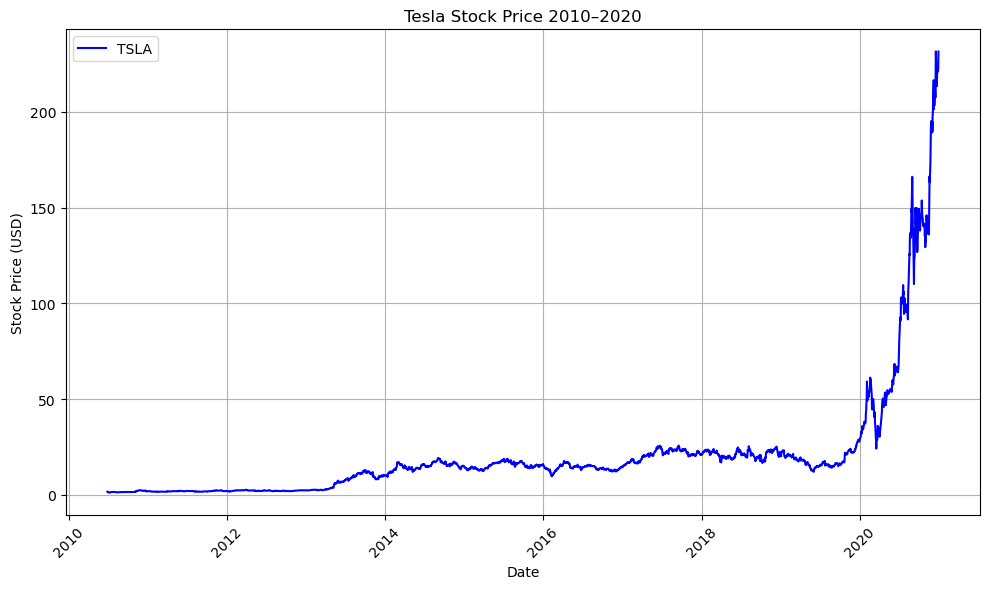

In [27]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, stock, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label=stock, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function using tesla_data
make_graph(tesla_data, 'TSLA', 'Tesla Stock Price 2010–2020')


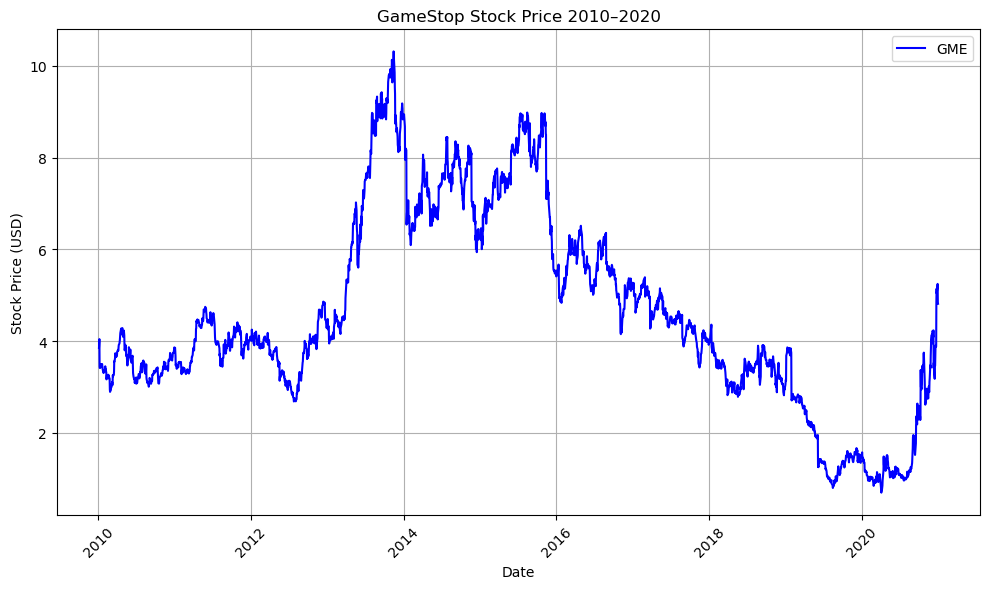

In [29]:
# Ensure the Date column is in datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Plot the GME stock graph
make_graph(gme_data, 'GME', 'GameStop Stock Price 2010–2020')
